In [1]:
### Load data IMU CSV dan dibersihkan tahap 1###
import pandas as pd


# Baca data CSVju
df = pd.read_excel('imudata_baru.xlsx')

# 1. Tampilkan info umum data
print(df.info())
print(df.head())

# 2. Buang kolom yang tidak relevan (ganti 'kolom_tidak_dipakai' sesuai kebutuhan)
# df.drop(columns=['kolom_tidak_dipakai'], inplace=True)

# 3. Tangani nilai hilang (missing values)
# Contoh: isi dengan median, hapus, atau metode lain
# df = df.dropna()  # jika ingin langsung membuang baris yang ada NaN
# df['kolom_angka'] = df['kolom_angka'].fillna(df['kolom_angka'].median())

# 4. Bersihkan data string, misalnya hapus spasi putih atau ubah ke lowercase
# df['nama_kolom'] = df['nama_kolom'].str.strip().str.lower()

# 5. Ubah tipe data jika perlu
# df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')
# df['angka'] = pd.to_numeric(df['angka'], errors='coerce')

# 6. Buang duplikat
df.drop_duplicates(inplace=True)

# 7. Simpan data yang sudah dibersihkan
df.to_csv('data_imu_clean1.csv', index=False)
print("Data berhasil dibersihkan dan disimpan sebagai 'data_imu_clean1.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ax      1085 non-null   object 
 1   ay      1085 non-null   object 
 2   az      1085 non-null   float64
 3   gx      1085 non-null   float64
 4   gy      1085 non-null   float64
 5   gz      1085 non-null   float64
 6   label   1085 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 59.5+ KB
None
         ax        ay        az        gx        gy        gz  label
0 -0.078629 -0.072346  0.328973 -0.030680 -0.117878 -0.096649      1
1  0.027023  0.135176  0.212524 -0.082713  0.010752  0.040630      1
2  0.127246   0.04087 -0.545340 -0.049066  0.074546  0.170800      1
3  0.009516  0.053802 -0.926224 -0.057500  0.105462 -0.438776      1
4 -0.006466  0.918721  0.430050 -0.146734  0.144089  0.588326      1
Data berhasil dibersihkan dan disimpan sebagai 'data_imu_clean1.csv'


In [2]:
import pandas as pd

# Load CSV dan paksa semua nilai ke bentuk numerik
df = pd.read_csv("data_imu_clean1.csv")

# Buang spasi putih di awal/akhir sel
df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)

# Konversi semua kolom ke numeric jika bisa, dan paksa NaN jika gagal
for col in df.select_dtypes(include=['object', 'string']).columns:
    df[col] = df[col].map(lambda x: str(x).strip() if isinstance(x, str) else x)

df[df.select_dtypes(include='object').columns] = (
    df.select_dtypes(include='object')
      .apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))
)



# Drop baris dengan NaN akibat parsing gagal
df.dropna(inplace=True)
df.to_csv("data_imu_clean_02.csv", index=False)
print("File bersih disimpan sebagai: data_imu_oke_clean_02.csv")

print("Data berhasil dibersihkan dari nilai yang tidak bisa dikonversi.")


File bersih disimpan sebagai: data_imu_oke_clean_02.csv
Data berhasil dibersihkan dari nilai yang tidak bisa dikonversi.


/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_1744/1598909919.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


Label yang ditemukan: [ 0  1 10]


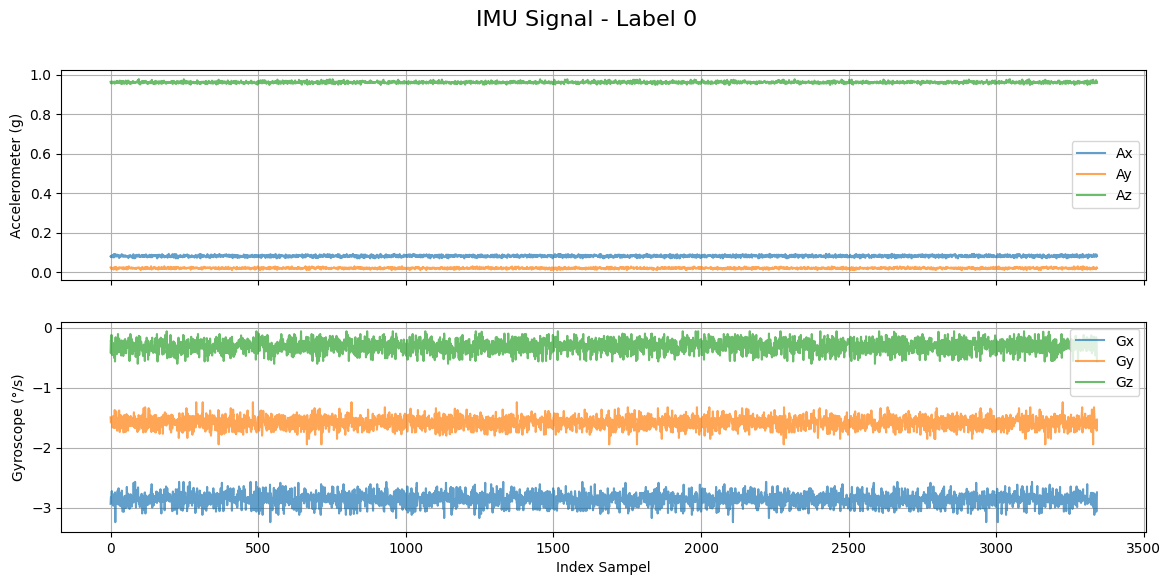

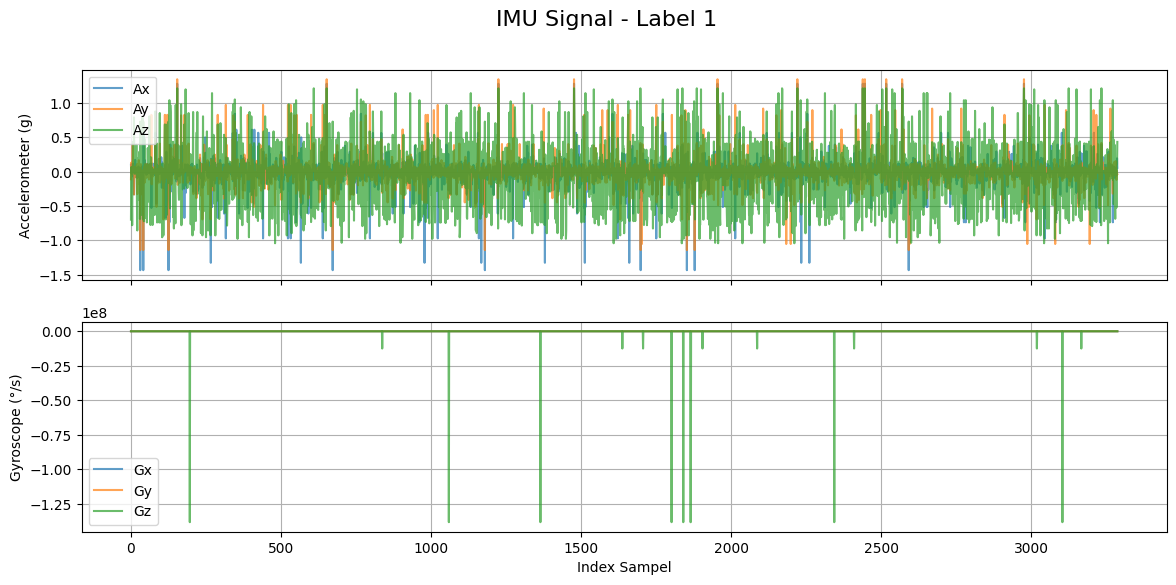

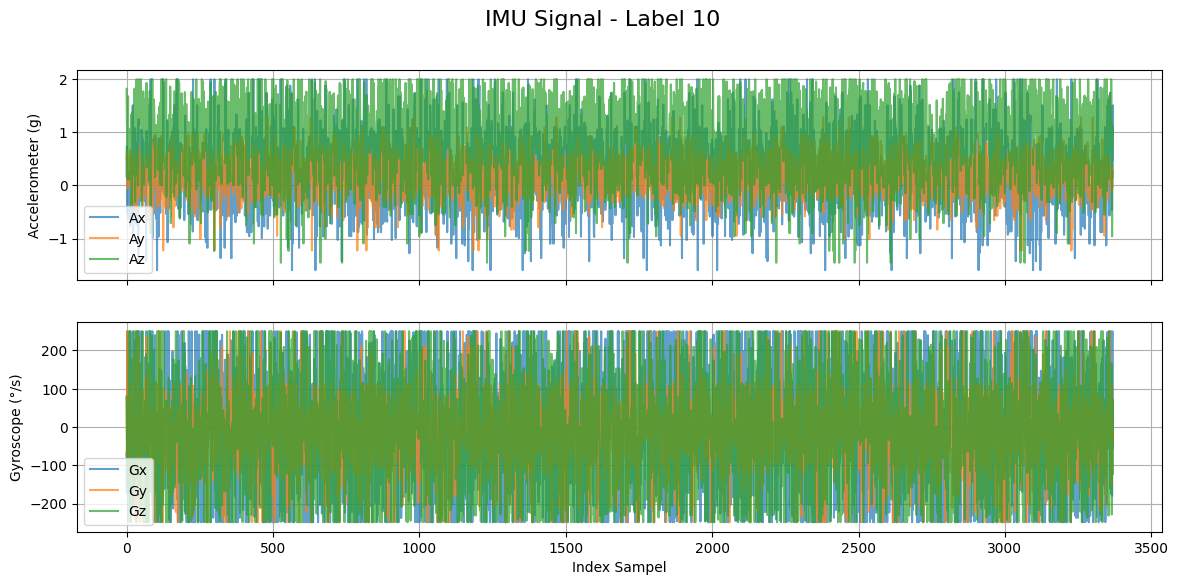

In [3]:
### Visualisasi data IMU
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Baca file CSV
df = pd.read_csv("expanded_proportional.csv")

# Tampilkan label unik
print("Label yang ditemukan:", df['label'].unique())

# Loop visualisasi per label
for label in sorted(df['label'].unique()):
    subset = df[df['label'] == label].reset_index(drop=True)

    fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
    fig.suptitle(f'IMU Signal - Label {label}', fontsize=16)

    # Akselerometer
    axs[0].plot(subset['ax'], label='Ax', alpha=0.7)
    axs[0].plot(subset['ay'], label='Ay', alpha=0.7)
    axs[0].plot(subset['az'], label='Az', alpha=0.7)
    axs[0].set_ylabel('Accelerometer (g)')
    axs[0].legend()
    axs[0].grid(True)

    # Gyroscope
    axs[1].plot(subset['gx'], label='Gx', alpha=0.7)
    axs[1].plot(subset['gy'], label='Gy', alpha=0.7)
    axs[1].plot(subset['gz'], label='Gz', alpha=0.7)
    axs[1].set_ylabel('Gyroscope (°/s)')
    axs[1].set_xlabel('Index Sampel')
    axs[1].legend()
    axs[1].grid(True)